In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('driver-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
from sklearn.cluster import KMeans

In [6]:
df_analyze = df.drop('id',axis=1)

In [28]:
kmeans = KMeans(n_clusters=2)

In [29]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [30]:
kmeans.cluster_centers_

array([[5.00476344e+01, 8.82875000e+00, 6.93889390e-16],
       [1.80017075e+02, 1.82900000e+01, 1.13000000e+00]])

In [31]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
df_analyze['clusters'] = kmeans.labels_

In [33]:
df_analyze.head()

,mean_dist_day,mean_over_speed_perc,clusters
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


In [34]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

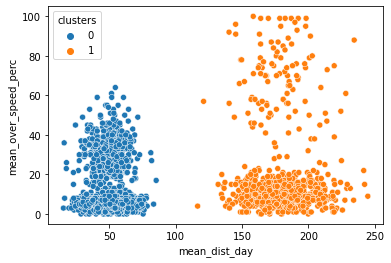

In [35]:
sns.scatterplot('mean_dist_day','mean_over_speed_perc',hue='clusters',data=df_analyze)

In [36]:
dist =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_analyze)
    dist.append(kmeans.inertia_)

In [37]:
dist

[12185266.129627984,
 1316420.850947721,
 992634.06067025,
 719603.9690822506,
 534639.1235684077,
 372831.0411890406,
 319784.1154798069,
 276919.0886842406,
 253435.46902924258,
 230871.05425587817]

In [38]:
import matplotlib.pyplot as plt

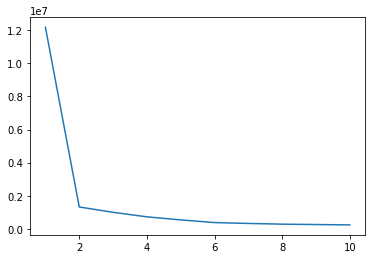

In [39]:
plt.plot(range(1,11),dist)

In [40]:
kmeans.labels_

array([5, 5, 5, ..., 6, 1, 6])